In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
df['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [4]:
df['variety'].drop_duplicates()

0          Setosa
50     Versicolor
100     Virginica
Name: variety, dtype: object

In [5]:
train,test = train_test_split(df, test_size = 0.2 , random_state=0)

In [6]:
train = train.query("variety == 'Versicolor' | variety == 'Virginica'")
test = test.query("variety == 'Versicolor' | variety == 'Virginica'")

In [7]:
train['variety'] = np.where(train['variety'] == 'Versicolor',0,1)
test['variety'] = np.where(test['variety'] == 'Versicolor',0,1)

In [23]:
test

,sepal.length,sepal.width,petal.length,petal.width,variety
114,5.8,2.8,5.1,2.4,1
62,6.0,2.2,4.0,1.0,0
107,7.3,2.9,6.3,1.8,1
100,6.3,3.3,6.0,2.5,1
86,6.7,3.1,4.7,1.5,0
76,6.8,2.8,4.8,1.4,0
71,6.1,2.8,4.0,1.3,0
134,6.1,2.6,5.6,1.4,1
51,6.4,3.2,4.5,1.5,0
73,6.1,2.8,4.7,1.2,0


In [8]:
pd.isna(df).sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
train_x = train.drop('variety',axis = 1)
train_y = train['variety'] 

In [10]:
test_x = test.drop('variety',axis = 1)
test_y = test['variety'] 

In [11]:
LR = LogisticRegression(solver = 'lbfgs', max_iter = 1000).fit(train_x,train_y)
LiR = LinearRegression().fit(train_x,train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x,train_y)
DT = DecisionTreeClassifier().fit(train_x,train_y)
KNN = KNeighborsClassifier().fit(train_x,train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

In [12]:
print("Acurácia LR:", LR.score(test_x,test_y),"\n")
print("Acurácia LiR:", LiR.score(test_x,test_y),"\n")
print("Acurácia LDA:", LDA.score(test_x,test_y),"\n")
print("Acurácia DT:", DT.score(test_x,test_y),"\n")
print("Acurácia KNN:", KNN.score(test_x,test_y),"\n")
print("Acurácia SVM:", SVM.score(test_x,test_y),"\n")
print("Acurácia RF:", RF.score(test_x,test_y),"\n")

Acurácia LR: 1.0 

Acurácia LiR: 0.7561892997402483 

Acurácia LDA: 1.0 

Acurácia DT: 1.0 

Acurácia KNN: 0.9473684210526315 

Acurácia SVM: 1.0 

Acurácia RF: 1.0 



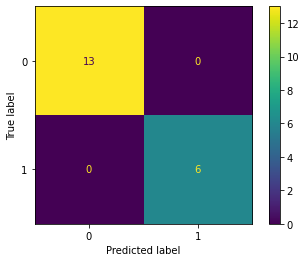

In [13]:
plot_confusion_matrix(LR,test_x,test_y)
plt.show()

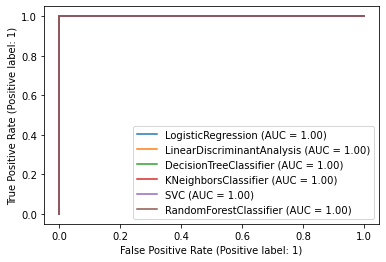

In [14]:
plot_roc_curve(LR,test_x,test_y,ax=plt.gca())
plot_roc_curve(LDA,test_x,test_y,ax=plt.gca())
plot_roc_curve(DT,test_x,test_y,ax=plt.gca())
plot_roc_curve(KNN,test_x,test_y,ax=plt.gca())
plot_roc_curve(SVM,test_x,test_y,ax=plt.gca())
plot_roc_curve(RF,test_x,test_y,ax=plt.gca())